# Filtering in Frequency Domain

In this notebook, we will show how to use skimage for performing image enhancement in Frequency Domain.

In [1]:
%matplotlib inline
import skimage
import numpy as np
from matplotlib import pyplot as plt

<class 'numpy.ndarray'> float64 (512, 512)


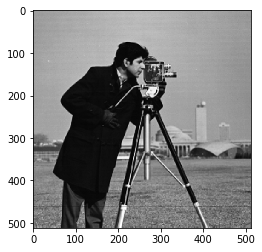

In [3]:
from skimage import data, img_as_float
from skimage import exposure

image = img_as_float(data.camera())

print(type(image), image.dtype, image.shape)
plt.imshow(image, cmap='gray', interpolation='nearest');

## Discrete Fourier Transform by FFT

In this examplem, we will transform the camera image to DFT domain by the Numpy fft2 function.

To understand the characteristics of the DFT transformed image, we have to apply log intersity transformation to enlarge the intensity of the coefficients with small value. In addition, shift the low frequency to the center is also commonly used for visual the DFT domain.

<class 'numpy.ndarray'> complex128 (512, 512)


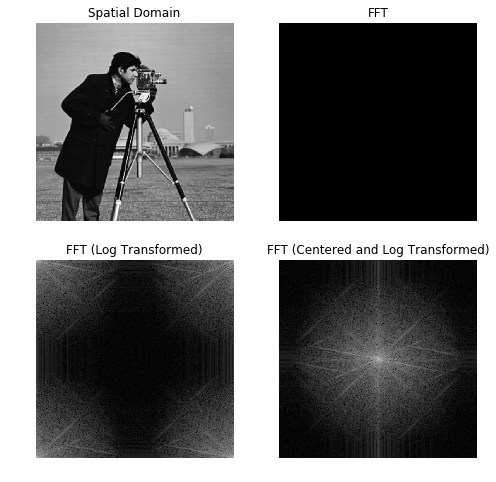

In [7]:
# Take the 2-dimensional DFT and centre the frequencies
fft_image = np.fft.fft2(image)
fft_shift_image = np.fft.fftshift(fft_image)

print(type(fft_image), fft_image.dtype, fft_image.shape)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(image)
ax[0,0].axis('off')
ax[0,0].set_title('Spatial Domain')

ax[0,1].imshow(np.abs(fft_image))
ax[0,1].axis('off')
ax[0,1].set_title('FFT')

ax[1,0].imshow(np.log(np.abs(fft_image)+1))
ax[1,0].axis('off')
ax[1,0].set_title('FFT (Log Transformed)')

ax[1,1].imshow(np.log(np.abs(fft_shift_image)+1))
ax[1,1].axis('off')
ax[1,1].set_title('FFT (Centered and Log Transformed)')


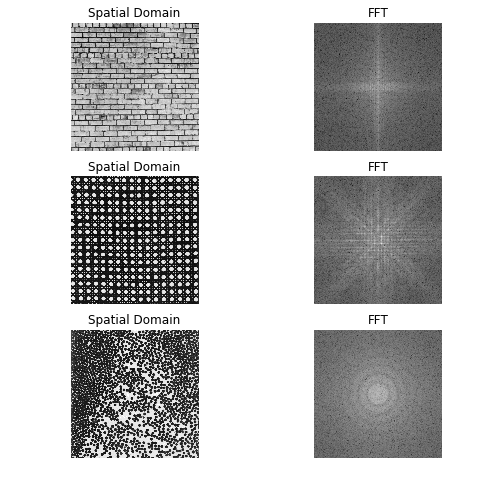

In [8]:
from skimage import io

image01 = io.imread('D95.gif')
fft_image01 = np.fft.fftshift(np.fft.fft2(image01))

image02 = io.imread('D102.gif')
fft_image02 = np.fft.fftshift(np.fft.fft2(image02))

image03 = io.imread('D67.gif')
fft_image03 = np.fft.fftshift(np.fft.fft2(image03))

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(image01)
ax[0,0].axis('off')
ax[0,0].set_title('Spatial Domain')

ax[0,1].imshow(np.log(np.abs(fft_image01)+1))
ax[0,1].axis('off')
ax[0,1].set_title('FFT')

ax[1,0].imshow(image02)
ax[1,0].axis('off')
ax[1,0].set_title('Spatial Domain')

ax[1,1].imshow(np.log(np.abs(fft_image02)+1))
ax[1,1].axis('off')
ax[1,1].set_title('FFT')


ax[2,0].imshow(image03)
ax[2,0].axis('off')
ax[2,0].set_title('Spatial Domain')

ax[2,1].imshow(np.log(np.abs(fft_image03)+1))
ax[2,1].axis('off')
ax[2,1].set_title('FFT')

## Filtering in Frequency Domain

In order to perform the filtering in Fourier domain, we need to make the spatial filter kernel size same as the image. 

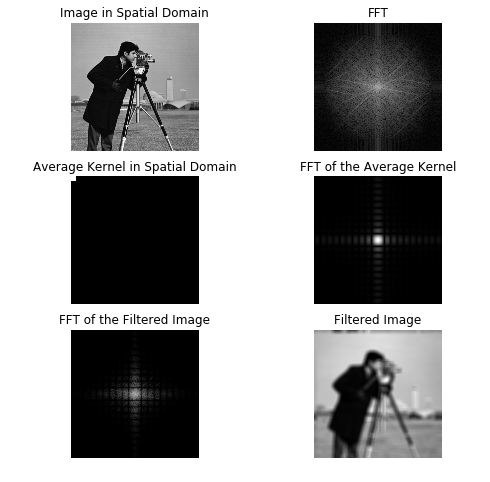

In [9]:
from skimage import data, img_as_float

image = img_as_float(data.camera())

fft_image = np.fft.fftshift(np.fft.fft2(image))

# Create a NxN simple average filter in spatial domain with same size of the input image
N = 20
average_kernel = np.zeros(image.shape)
average_kernel[0:N, 0:N] = 1.0/(N*N)

# Transform the kernel to Frequency domain
fft_average_kernel = np.fft.fftshift(np.fft.fft2(average_kernel))

# Perform the filtering in frequency domain by m
fft_filtered_image = fft_image * fft_average_kernel
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_filtered_image)))

# Display the results
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(image)
ax[0,0].axis('off')
ax[0,0].set_title('Image in Spatial Domain')

ax[0,1].imshow(np.log(np.abs(fft_image)+1))
ax[0,1].axis('off')
ax[0,1].set_title('FFT')

ax[1,0].imshow(average_kernel)
ax[1,0].axis('off')
ax[1,0].set_title('Average Kernel in Spatial Domain')

ax[1,1].imshow(np.log(np.abs(fft_average_kernel)+1))
ax[1,1].axis('off')
ax[1,1].set_title('FFT of the Average Kernel')


ax[2,0].imshow(np.log(np.abs(fft_filtered_image)+1))
ax[2,0].axis('off')
ax[2,0].set_title('FFT of the Filtered Image')

ax[2,1].imshow(filtered_image)
ax[2,1].axis('off')
ax[2,1].set_title('Filtered Image')


## Ideal Low Pass Filter in Frequency Domain

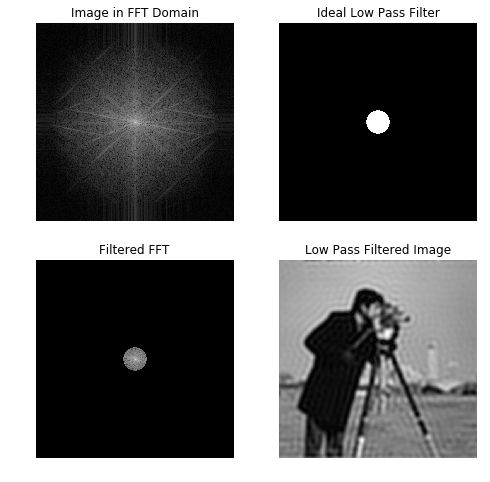

In [10]:
def ideal2d_lp(shape, f, pxd=1):
    """Designs an ideal filter with cutoff frequency f. pxd defines the number
   of pixels per unit of frequency (e.g., degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = np.ones(shape)
    filt[radius>f] = 0
    return filt

ilpf = ideal2d_lp(image.shape, 1.5000, pxd=20)
fft_new = fft_shift_image * ilpf
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(ilpf)
ax[0,1].axis('off')
ax[0,1].set_title('Ideal Low Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_new)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(new_image))
ax[1,1].axis('off')
ax[1,1].set_title('Low Pass Filtered Image')


## Gaussian Filter in Frequency Domain

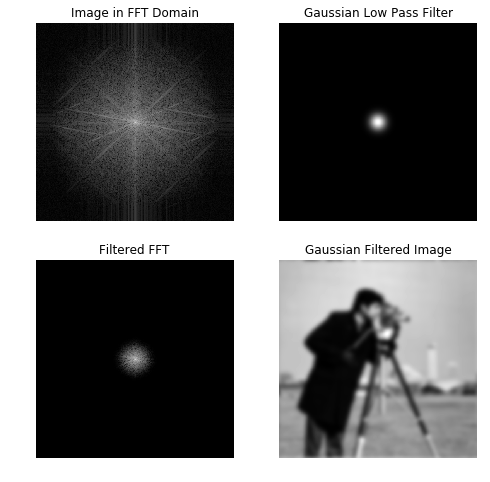

In [11]:
# Build and apply a Gaussian filter.
sigmax, sigmay = 20, 20
nrows, ncols = image.shape

cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

fft_filtered = fft_shift_image * gmask

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_filtered)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(gmask)
ax[0,1].axis('off')
ax[0,1].set_title('Gaussian Low Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_filtered)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(filtered_image))
ax[1,1].axis('off')
ax[1,1].set_title('Gaussian Filtered Image')


## Butterworth Filter

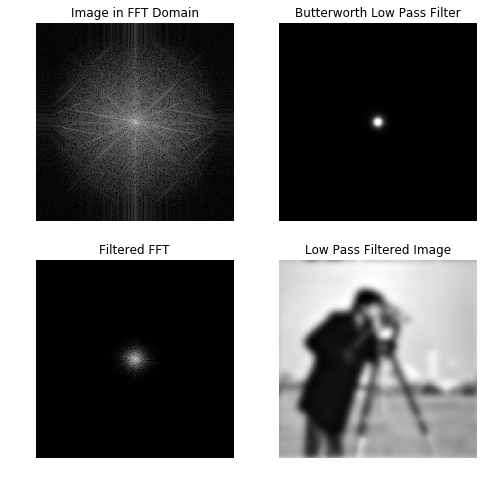

In [12]:
def butter2d_lp(shape, f, n, pxd=1):
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt

butter_filter = butter2d_lp(image.shape, 0.2, 2, pxd=60)
fft_new = fft_shift_image * butter_filter
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(butter_filter)
ax[0,1].axis('off')
ax[0,1].set_title('Butterworth Low Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_new)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(new_image))
ax[1,1].axis('off')
ax[1,1].set_title('Low Pass Filtered Image')


## Ideal High Pass Filter

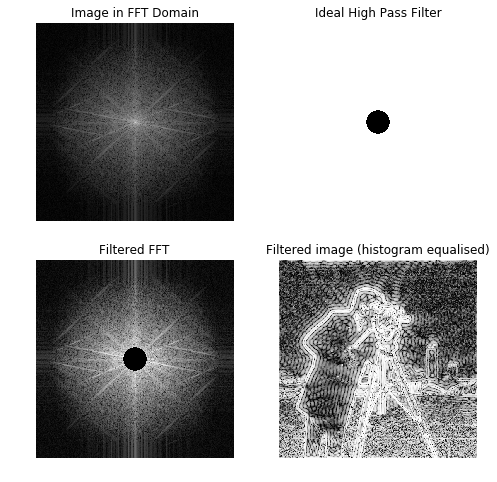

In [13]:
def ideal2d_hp(shape, f, pxd=1):
    """Designs an ideal filter with cutin frequency f. pxd defines the number
   of pixels per unit of frequency (e.g., degrees of visual angle)."""
    return 1. - ideal2d_lp(shape, f, pxd)

ihpf = ideal2d_hp(image.shape, 1.5000, pxd=20)
fft_new = fft_shift_image * ihpf
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
new_image = exposure.equalize_hist(new_image)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(ihpf)
ax[0,1].axis('off')
ax[0,1].set_title('Ideal High Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_new)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(new_image))
ax[1,1].axis('off')
ax[1,1].set_title('Filtered image (histogram equalised)')

## Butterworth High Pass Filter

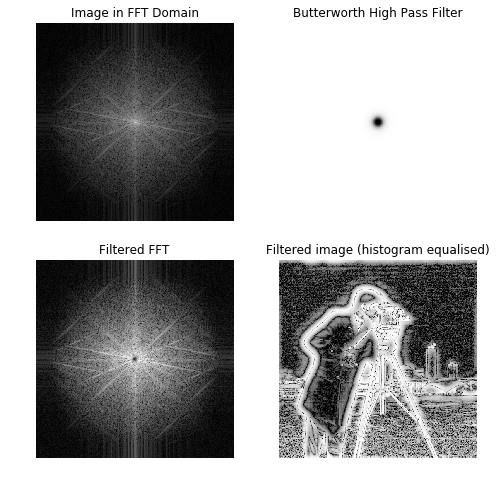

In [14]:
def butter2d_hp(shape, f, n, pxd=1):
    """Designs an n-th order highpass 2D Butterworth filter with cutin
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    return 1. - butter2d_lp(shape, f, n, pxd)

butter_filter = butter2d_hp(image.shape, 0.2, 2, pxd=60)
fft_new = fft_shift_image * butter_filter
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
new_image = exposure.equalize_hist(new_image)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(butter_filter)
ax[0,1].axis('off')
ax[0,1].set_title('Butterworth High Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_new)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(new_image))
ax[1,1].axis('off')
ax[1,1].set_title('Filtered image (histogram equalised)')


## Ideal Band Pass Filter

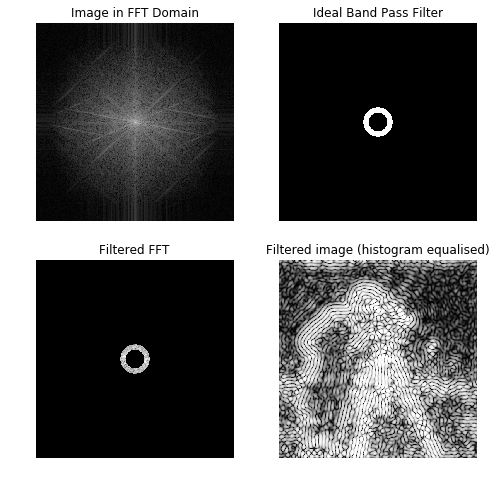

In [15]:
def ideal2d_bp(shape, cutin, cutoff, pxd=1):
    """Designs an ideal filter with cutin and cutoff frequencies. pxd defines
   the number of pixels per unit of frequency (e.g., degrees of visual
   angle)."""
    return ideal2d_lp(shape,cutoff,pxd) - ideal2d_lp(shape,cutin,pxd)

ibpf = ideal2d_bp(image.shape, 1.200, 1.900, pxd=20)
fft_new = fft_shift_image * ibpf
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
new_image = exposure.equalize_hist(new_image)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(ibpf)
ax[0,1].axis('off')
ax[0,1].set_title('Ideal Band Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_new)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(new_image))
ax[1,1].axis('off')
ax[1,1].set_title('Filtered image (histogram equalised)')

## Ideal Butterworth Band Pass Filter

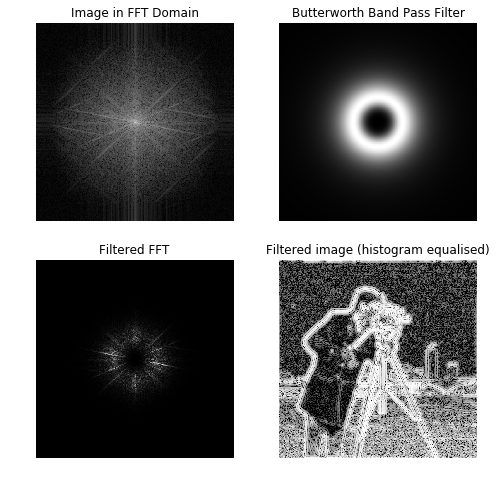

In [16]:
def butter2d_bp(shape, cutin, cutoff, n, pxd=1):
    """Designs an n-th order bandpass 2D Butterworth filter with cutin and
   cutoff frequencies. pxd defines the number of pixels per unit of frequency
   (e.g., degrees of visual angle)."""
    return butter2d_lp(shape,cutoff,n,pxd) - butter2d_lp(shape,cutin,n,pxd)

butter_filter = butter2d_bp(image.shape, 1.50001, 1.50002, 2, pxd=43)
fft_new = fft_shift_image * butter_filter
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))

new_image = exposure.equalize_hist(new_image)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True,
                       sharey=True)
plt.gray()

ax[0,0].imshow(np.log(np.abs(fft_shift_image)+1))
ax[0,0].axis('off')
ax[0,0].set_title('Image in FFT Domain')

ax[0,1].imshow(butter_filter)
ax[0,1].axis('off')
ax[0,1].set_title('Butterworth Band Pass Filter')

ax[1,0].imshow(np.log(np.abs(fft_new)+1))
ax[1,0].axis('off')
ax[1,0].set_title('Filtered FFT')

ax[1,1].imshow(np.abs(new_image))
ax[1,1].axis('off')
ax[1,1].set_title('Filtered image (histogram equalised)')